In [138]:
import tensorflow as tf
#import tensorflow_io as tfio
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

import numpy as np

In [139]:
images_dir = r"C:\Users\nicol\OneDrive\Documentos\DiplomadoCienciaDatos\Modulo06_RedesNeuronalesProfundas\Proyecto_ClasificacionImagenes\dataset"

Found 4217 images belonging to 4 classes.


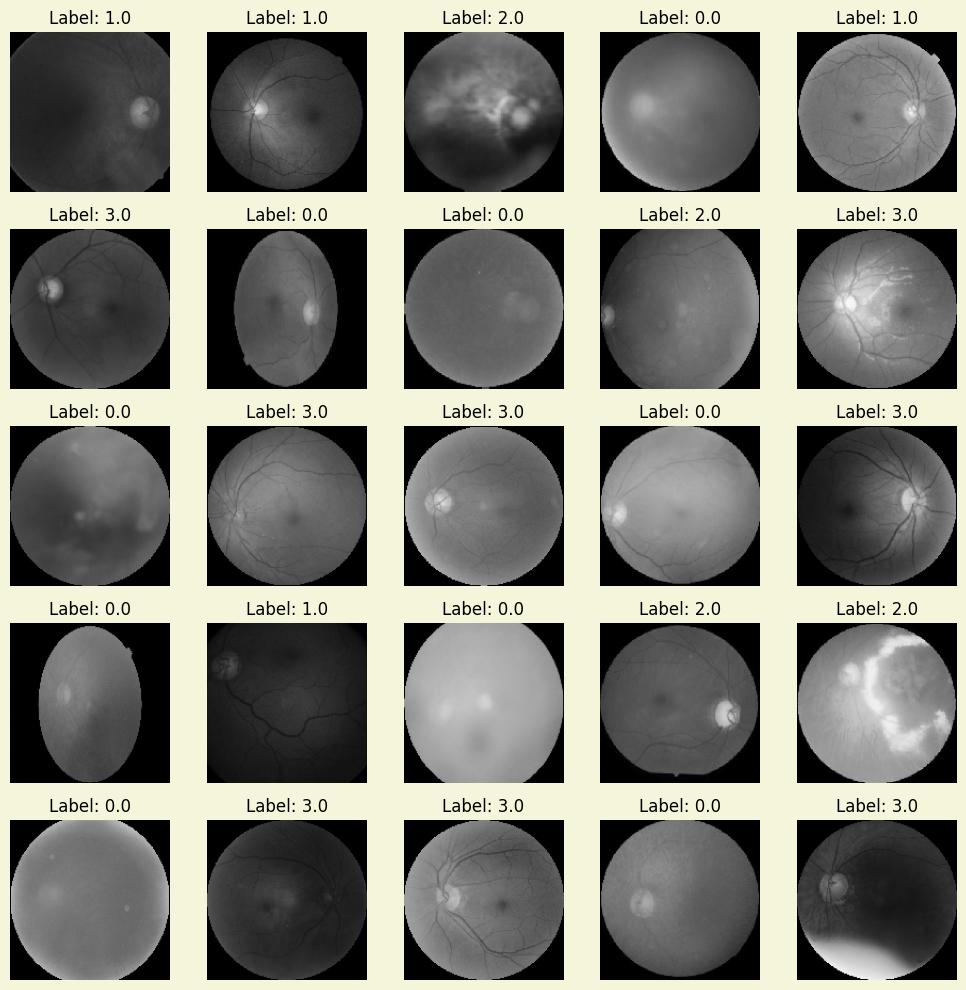

In [140]:
#Aplica tranformaciones en las imagenes si se necesita, según los parametros dados

datagen = ImageDataGenerator(
    rescale = 1./255, #Normalizar valor de los píxeles
    #rotation_range = 0, #Rotación de la imagen en 0
    #width_shift_range = 0, #Desplazamineto horizontal de la imagen en 0
    #height_shift_rage = 0, #Desplzamiento vertical de la imagen en 0
    #shear_range = 0, #Corte aleatorio en 0
    #zoom_range = 0.2, #Zoom / Acercamiento de la imagen aleatorio
    horizontal_flip = False, #Volteo horizontal aleatorio no
    fill_mode = 'nearest',
    preprocessing_function = tf.image.rgb_to_grayscale #Convierte las imagenes de color a escala de grises. Es decir de 3 canales (RGB) a solo 1
)

'''
flow_from_directory()
Toma la ruta del directorio y genera lotes de datos aumentados'

'''
image_generator = datagen.flow_from_directory( 
    images_dir,
    target_size = (150, 150),
    color_mode = 'rgb',
    batch_size = 32,
    class_mode = 'sparse' # Devuelve etiquetas enteras en vez de one-hot
    #shuffle = True,
    #seed = 42,
    )

#Crear un plot para visualizar las imagenes
def plot_images(images, titles):
    plt.figure(figsize=(10, 10), facecolor = 'beige')
    for i in range(min(25, len(images))):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

images, labels = next(image_generator)
plot_images(images, [f'Label: {label}' for label in labels])

In [142]:
#Creación del modelo de entrenamiento
from tensorflow.keras import layers, models

def create_model():
    model = models.Sequential([
            #Capa de entrada
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)), #input_shape: Son lo datos de entrada: Pixeles y 1 canal de color
            layers.MaxPooling2D(2,2), #(2,2 tamaño de la matriz)
            
            #Conv2D: Capa convolucional y MaxPooling2D:Capa de agrupación
            layers.Conv2D(64,(3,3)), #Numero de nucleos que se utilizaran para procesar la imagen, tamaño de los nucleos(matriz kernel)
            layers.MaxPooling2D(2,2),

            layers.Conv2D(128, (3,3)), #Aumentamos el numero de nucleos
            layers.MaxPooling2D(2,2),

            layers.Flatten(), #Aplasta todo a una sola dimensión
            
            #Capas ocultas
            layers.Dense(50, activation = 'relu'),

            #Capa de salida
            layers.Dense(4, activation = 'softmax') 

        ])
    return model

model = create_model()
'''
 Función softmax se utiliza para asegurar que la suma de las neuronas de salida siempre nos de 1.
La neurona que tenga el mayor valor es el resultado de la predicción
'''

'\n Función softmax se utiliza para asegurar que la suma de las neuronas de salida siempre nos de 1.\nLa neurona que tenga el mayor valor es el resultado de la predicción\n'

In [143]:
#Compilar modelo
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', #Función de perdida
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_84 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_80 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_85 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_81 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_82 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_27 (Flatten)            │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 50)             │     1,849,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,943,102 (7.41 MB)

 Trainable params: 1,943,102 (7.41 MB)

 Non-trainable params: 0 (0.00 B)

In [144]:
#Optimizadores
#Es un diccionario
optimizers = {
    'Adam': tf.keras.optimizers.Adam(), #Adaptime Moment Estimation
    'SGD': tf.keras.optimizers.SGD(),
    'RMSprop': tf.keras.optimizers.RMSprop()
}

In [152]:
#Entrenar modelo

def train_model_with_optimizer(optimizer, epochs= 5):
    model.compile(optimizer=optimizer,
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'])

    history = model.fit(
    image_generator,
    steps_per_epoch=image_generator.samples // image_generator.batch_size,
    epochs=epochs
    )
    '''
    history: contendrá los datos del modelo de entrenamiento
    image_generator: Aquí tenemos nuestro dataset de imagenes image_generator, #Aquí tenemos nuestro dataset de imagenes    image_generator.samples: número total de imagenes dentro del dataset
    image_generator.batch_size: cantidad de imagenes que el generador procesa en cada lote (batch)
    '''
    return history


histories = {}

for opt_name, optimizer in optimizers.items():
    print(f"Entrenando con {opt_name}...")

    model = create_model()
    model.compile(optimizer=optimizer,
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'])

    history = model.fit(
        image_generator,
        steps_per_epoch=image_generator.samples // image_generator.batch_size,
        epochs= 4,
        verbose = 1
    )

    histories[opt_name] = history



Entrenando con Adam...


C:\Users\nicol\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\nicol\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/4
131/131 ━━━━━━━━━━━━━━━━━━━━ 54s 402ms/step - accuracy: 0.4164 - loss: 1.3565
Epoch 2/4
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.7812 - loss: 0.5366    
Epoch 3/4


C:\Users\nicol\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


131/131 ━━━━━━━━━━━━━━━━━━━━ 49s 376ms/step - accuracy: 0.7223 - loss: 0.6546
Epoch 4/4
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 63us/step - accuracy: 0.6875 - loss: 0.4947  
Entrenando con SGD...
Epoch 1/4
131/131 ━━━━━━━━━━━━━━━━━━━━ 49s 369ms/step - accuracy: 0.3706 - loss: 1.3151
Epoch 2/4
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 76us/step - accuracy: 0.4688 - loss: 1.1866  
Epoch 3/4
131/131 ━━━━━━━━━━━━━━━━━━━━ 48s 370ms/step - accuracy: 0.4991 - loss: 1.0817
Epoch 4/4
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 45us/step - accuracy: 0.5625 - loss: 0.9696  
Entrenando con RMSprop...
Epoch 1/4
131/131 ━━━━━━━━━━━━━━━━━━━━ 49s 371ms/step - accuracy: 0.4461 - loss: 1.9251
Epoch 2/4
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 41us/step - accuracy: 0.6875 - loss: 0.6783  
Epoch 3/4
131/131 ━━━━━━━━━━━━━━━━━━━━ 49s 376ms/step - accuracy: 0.6809 - loss: 0.7526
Epoch 4/4
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 68us/step - accuracy: 0.7500 - loss: 0.6417  


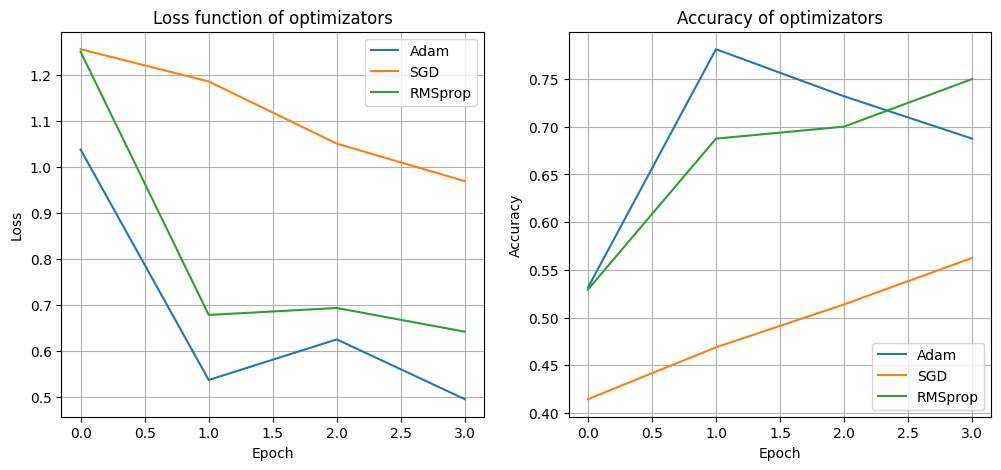

In [153]:
#Graficar resultados por optimizador
plt.figure(figsize = (12, 5))

#Gráficar función de perdida
plt.subplot(1,2,1)
for name, history in histories.items():

    plt.plot(history.history['loss'], label = name)
    plt.title("Loss function of optimizators")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()

#Gráficar precisión
plt.subplot(1,2,2)

for name, history in histories.items():
    plt.plot(history.history['accuracy'], label = name)
    plt.title("Accuracy of optimizators")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()

plt.show()


### Probar el modelo

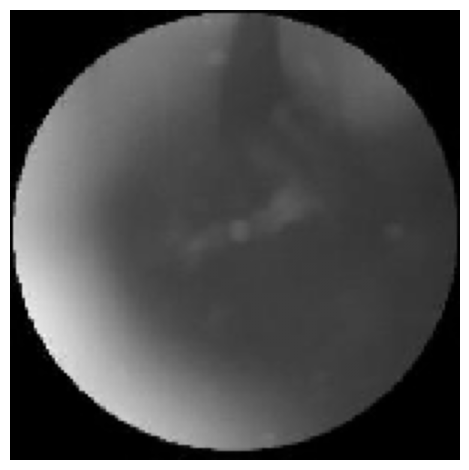

In [212]:
#Mostrar imagen de prueba
from tensorflow.keras.preprocessing import image

image_dir_test = r"C:\Users\nicol\OneDrive\Documentos\DiplomadoCienciaDatos\Modulo06_RedesNeuronalesProfundas\Proyecto_ClasificacionImagenes\dataset\cataract\_51_7561724.jpg"

image_generator_test = image.load_img(image_dir_test, color_mode = 'grayscale', target_size = (150, 150))

#Convertir la imagen en un array
image_test_array = image.img_to_array(image_generator_test)
image_test_array = image_test_array / 255.0 #normalizar la imagen 

# Expandir dimensiones (de (150, 150, 1) a (1, 150, 150, 1))
image_test_array = np.expand_dims(image_test_array, axis=0)  

# Convertir de (1, 150, 150, 1) a (1, 150, 150, 3) si el modelo espera RGB
image_test_array = np.repeat(image_test_array, 3, axis=-1)

#Mostrar la imagen
#plt.figure(figsize = (30, 30))
#plt.subplot(1, 1, 1)
plt.imshow(image_test_array.squeeze(), cmap = "gray")
plt.axis("off")

plt.tight_layout()
plt.show()


In [189]:
print(model.input_shape)


(None, 150, 150, 3)


In [213]:
predictions = model.predict(image_test_array)
predicted_class = np.argmax(predictions)

match(predicted_class):
    case 0 :
        print("Predicción: Catarata")
    case 1:
        print("Predicción: Retinopatía Diabeta")
    case 2:
        print("Predicción: Glaucoma")
    case 3:
        print("Predicción: Normal")
    



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicción: Catarata
